In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns

/kaggle/input/msbd5001-spring-2022/sample_submission.csv
/kaggle/input/msbd5001-spring-2022/train.csv
/kaggle/input/msbd5001-spring-2022/test.csv


In [2]:
train_df=pd.read_csv('../input/msbd5001-spring-2022/train.csv')
test_df=pd.read_csv('../input/msbd5001-spring-2022/test.csv')

In [3]:
train_df=train_df.dropna(axis=0,how='any')
train_df=train_df.reset_index(drop=True)
train=train_df.drop(['id','label'],axis=1)
label=train_df.label

<AxesSubplot:>

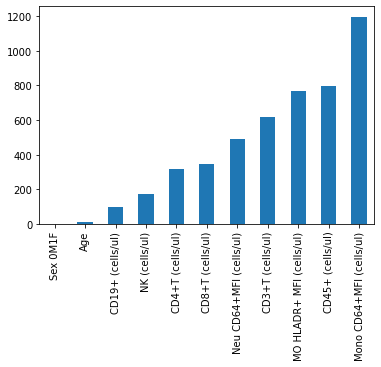

In [6]:
df = train_df.drop(['id', 'label'], axis=1).std()
df.sort_values().plot(kind='bar')

Index(['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)',
       'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Sex 0M1F', 'Mono CD64+MFI (cells/ul)'],
      dtype='object')
[0.07584428 0.33424449 0.05355908 0.06229069 0.0371589  0.17767868
 0.05070249 0.09431664 0.02904184 0.00290387 0.08225903]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

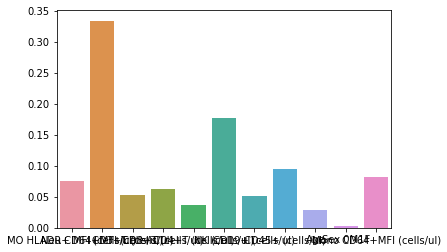

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train,label)

print(train.columns)
print(rf.feature_importances_)
sns.barplot(train.columns,rf.feature_importances_)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)',
       'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Sex 0M1F', 'Mono CD64+MFI (cells/ul)'],
      dtype='object')
[0.07971174 0.3756873  0.02809451 0.10627919 0.04517174 0.16001248
 0.06001917 0.04601404 0.02191602 0.         0.07709377]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

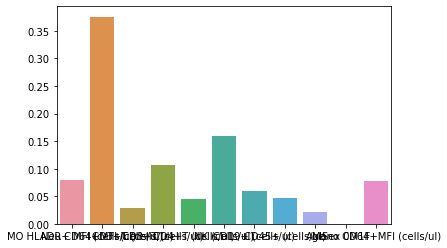

In [7]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(train,label)

print(train.columns)
print(xg.feature_importances_)
sns.barplot(train.columns,xg.feature_importances_)

[ 7.13329273 33.63636953 17.81632249 13.48625231 14.54065223 24.64782374
 12.98477315 24.81556256  0.06053974  0.14279306 14.22269382]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

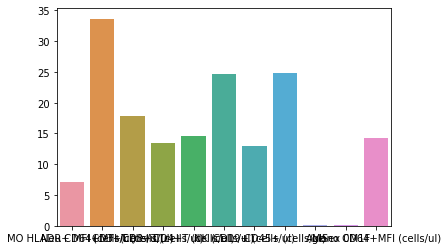

In [8]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(k='all')
sel.fit_transform(train,label)
print(sel.scores_)
sns.barplot(train.columns,sel.scores_)

In [ ]:
from sklearn import svm

svc=svm.LinearSVC()
svc.fit(train,label)

print(train.columns)
print(svc.coef_)

In [9]:
train=train.drop(['Age','Sex 0M1F'],axis=1)

In [10]:
train

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Mono CD64+MFI (cells/ul)
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,7515.0
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,1756.0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,1311.0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,1443.0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,1542.0
...,...,...,...,...,...,...,...,...,...
81,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,1521.0
82,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,1345.0
83,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,2926.0
84,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,2352.0


In [16]:

from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=10)
xgb=XGBClassifier()
scores = cross_val_score(xgb,train,label,cv=skf,scoring='accuracy') 
print(scores.mean())  

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [13]:
skf = StratifiedKFold(n_splits=10)
rfc=RandomForestClassifier()
scores = cross_val_score(rfc,train,label,cv=skf,scoring='accuracy') 
print(scores.mean()) 

0.9180555555555555


In [14]:
rfcc=RandomForestClassifier()
rfcc.fit(train,label)
test=test_df.drop(['id','Age','Sex 0M1F'],axis=1)
test_pre=rfcc.predict(test)

In [15]:
ids = test_df['id']
output = pd.DataFrame({ 'id' : ids, 'label': test_pre })
output.to_csv('submission.csv', index=False)